# IUPAC to Glycan

In this tutorial we will build a Glycan 3D model from a IUPAC string input. The process is actually as simple as one line of code:

In [1]:
import glycosylator as gl
gl.visual.set_backend('py3dmol')

Now let's build the glycan with [GlyCosmos ID G06969ZX](https://glycosmos.org/glycans/show/G06969ZX) from it's IUPAC string descriptor:

In [2]:
# the glycan's IUPAC string is given by:
# (just copy/past from GlyCosmos)
iupac = "Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"

<Axes: >

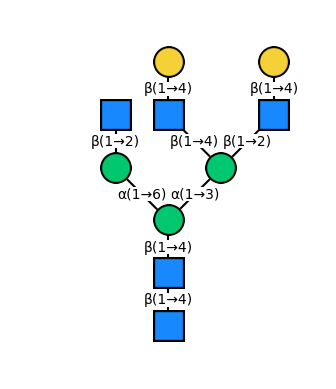

In [3]:
# and now pass the iupac string to the glycan function of glycosylator
my_glycan = gl.glycan(iupac)

# let's see
my_glycan.draw2d()

There it is! Now let's see what it looks like in 3D...

In [4]:
my_glycan.show3d()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

If we are unhappy with parts of it, we can call on the `optimize` method to improve the conformation a little :-)
To learn more about the optimization go check out the [BuildAMol tutorial](https://biobuild.readthedocs.io/en/latest/examples/optimization.html).

In [5]:
# optimize the conformation (if we are unhappy for some reason)
# there are of course many additional options that can be passed to this method...
my_glycan.optimize(rotatron_kws=dict(pushback=2, unfold=1))

my_glycan.show3d()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

While we are at it, let's check out if we can reverse-engineer the IUPAC string.

In [6]:
reverse = my_glycan.to_iupac()
print("new:  ", reverse)
print("orig: ", iupac)

new:   Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc(a1-
orig:  Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc


Ah, Glycosylator added a `(a1-` at the end of the string. We did not specify any isomer in the original input so Glycosylator assumed it would be the alpha configuration. Actually, we could tell Glycosylator to drop this suffix if it bothers us for some reason using `add_terminal_conformation=False` when calling `to_iupac` ...

If we are happy now, maybe we want to use the structure for some other experiment like molecular dynamics. Let's export the structure to a PDB file so we can use it with other software...

In [7]:
my_glycan.to_pdb("./files/my_first_glycan.pdb")

While we are at it, we can also directly pass the GlyCosmos ID to the `glycan` function in order to obtain our desired output:

<Axes: >

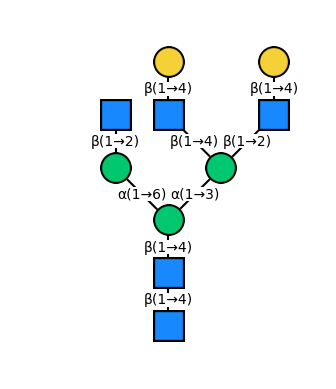

In [8]:
# this time we pass the ID directly so Glycosylator
# will perform a query to obtain the IUPAC string for us
my_glycan_again = gl.glycan("G06969ZX")
my_glycan_again.draw2d()

## Specifying Isomers
Monosaccharides can be found in different configurations. If a specific sugar such as Galactose has multiple possible stereoisomers available such as _$\alpha$-D-Galactose_ vs _$\alpha$-L-Galactose_ Glycosylator will by default go and select the first matching component that fits the provided input, thus potentially adding an isomer other than the one desired. This can be prevented by specifying isomer information within the IUPAC string like so:

1. add `a-` or `b-` if it's the first residue, otherwise ignore since the linkage information is normally used for this. However, if the code does not find the component, try adding it anyway.
2. add `l-` or `d-` to specify the isomer
3. add the monosaccharide code, e.g. `Glc`, `Gal`, etc.
4. add `p` or `f` for the pyranose or furanose forms (in some cases only one may be available anyway but still specify)
5. add the code for modifiers, e.g. `NAc`

The pattern looks like this: `<{a|b}-?>{d|l}-{code}{p|f}{mods}`, e.g. `d-Galp` for a D-configuration Galactopyranose or `a-l-GlcpNAc` for the L-configuration of alpha N-Acetylglucose. The information whether $\alpha$ or $\beta$ is required usually comes from the linkage that connects the given monosaccharide unit to the previous one in the glycan, however as in the case of the N-Acetylglucose in certain cases it may be necessary to provide it manually in case Glycosylator cannot find the component on it's own. But in general `d-Galp(b1-4)GlcNAc` will connect a $\beta$-D-Galactopyranose to the N-Acetylglucose without problems. There is also a [Github discussion](https://github.com/ibmm-unibe-ch/glycosylator/issues/2) that goes into some more details here.

In [2]:
# specify the stereochemistry of the terminal Galactose
iupac_with_l = "l-Galp(b1-4)GlcNAc"
iupac_with_d = "d-Galp(b1-4)GlcNAc"

# make sure to disable internal coordinate usage
# because these can only specify coordinates for one stereochemistry
# which may lead to unexpected results
gl.utils.dont_use_ic()

glycan_with_l = gl.glycan(iupac_with_l)
glycan_with_d = gl.glycan(iupac_with_d)

# make a 3D visualization
glycan_with_d.superimpose_to_residue(glycan_with_d.get_residue(1), glycan_with_l.get_residue(1))

v = glycan_with_l.py3dmol()
v += glycan_with_d.py3dmol()

v.add(glycan_with_l.get_residue(-1), style={"sphere": {"radius": 1, "opacity": 0.4, "color": "orange"}})
v.add(glycan_with_d.get_residue(-1), style={"sphere": {"radius": 1, "opacity": 0.4, "color": "purple"}})

v.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

And there we have two glycans with different isomers for Galactose!

## Specifying Modified or non-sugar Residues

What if we are trying to build a glycan with a specially modified monosaccharide or even a hybrid structure containing some completely different fragment? In these cases we may not be able to make a IUPAC string that describes the glycan we want to build. 

In general it is advisable to make modifications on an existing structure or manually assemble hybrid structures instead of trying to "hack" the IUPAC-string parsing and assembly pipeline of Glycosylator. However, to allow modified sugar residues that cannot be represented by a canonical IUPAC string or which are not understood by Glycosylator in IUPAC format for some reason, you can also directly pass the compound IDs of the fragments to use within the IUPAC string. 

In [10]:
# make a glycan by providing the PDB IDs of the monosaccharides we want to use
# BGC = beta-D-Glucose, BMA = beta-D-Mannose
pseudo_iupac = "BGC(b1-4)BMA(b1-4)Gal"
gl.glycan(pseudo_iupac).show3d()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

This method technically also supports any compound that can be obtained from the loaded component database and is not limited to IUPAC-representable sugars. However, in these cases we likely cannot use glycosidic linkages. So just like we can provide component IDs directly we can also provide linkage IDs directly. When providing custom linkage IDs we still have to provide `a` or `b` as prefix character so that downstream "normal" glycosidic linkages know which id's to reference when converting from IUPAC format (and custom linkage IDs must **not** contain `-`!). 
If that sounds weird and I lost you at this point. Let's make an example!

In [34]:
# let's say we want to make a pseudo-glycan which has a branched structure with a central benzene ring
# we could manually assemble this (which is probably what we should be doing anyways)
# but we can also "hack" our way through the IUPAC-string parsing pipeline to get it done "automatically"

# make sure the benzene is loaded
gl.load_small_molecules()

# define the pseudo-IUPAC string which contains both the benzene (BNZ) and a bunch
# of (as yet undefined) linkages %link1, %link2, %link3 all with a dummy prefix "a" to signify alpha-linkages
# which is important for the downstream glycans that will have normal glycosidic linkages
pseudo_iupac = "Man(b1-6)Man(a%link3)[GalNAc(a1-6)GalNAc(a%link2)][Glc(b1-3)Glc(a%link1)]BNZ"

# now we define the linkages and add them to the default topology
# so the system can find them when parsing the IUPAC string
link1 = gl.linkage("C1", "O1", id="%link1")
link2 = gl.linkage("C3", "O1", id="%link2")
link3 = gl.linkage("C5", "O1", id="%link3")
gl.add_linkage(link1)
gl.add_linkage(link2)
gl.add_linkage(link3)


# # now we can parse the IUPAC string
pseudo_glycan = gl.read_iupac("pseudo_glycan", pseudo_iupac)
pseudo_glycan.show3d()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

And there we have a "pseudo" glycan with a central benzene ring. Again, even though this does work. If you have derivatives like this to make, you should really just use proper methods like `attach` to manually assemble the structure you are interested in! This kind of hacking may not be convenient or reliable depending on the situation. 

And with that we have reached the end of this tutorial! To reacp: we can pass IUPAC-format strings to the top-level `glycan` function (or the `read_iupac` function, of course). We can even make modified glycans or pseudo-glycans in this fashion by including component and linkage IDs directly into the IUPAC strings, although this "feature" should not be relied on too heavily. Thanks for sticking round until the end and good luck with your project using Glycosylator! 